# Analysis of results

- after running `run_eval.sh` with at least 1 model

In [91]:
from analysis_tools import read_all_results, plot_accuracy

ImportError: cannot import name 'plot_accuracy' from 'analysis_tools' (c:\Users\przvl\Dropbox\Uni\BSc Computerlinguistik\06 SoSe 24\Bachelor\Stede - Beyer\eval_pipeline\bin\analysis_tools.py)

In [87]:
base_folder = "../results"

In [88]:
all_dfs = read_all_results(base_folder)

In [89]:
import matplotlib.pyplot as plt

def plot_accuracy(all_dfs):
    """
    Plots the accuracy for each model and revision for each DataFrame separately.
    
    Args:
    all_dfs (dict): A dictionary where keys are DataFrame names and values are DataFrames.
    """
    for name, df in all_dfs.items():
        grouped = df.groupby(['model', 'revision'])
        accuracies = []
        model_revisions = []
        for (model_name, revision), group in grouped:
            accuracy = group["model_prefers_good_continuation"].mean()
            model_name = model_name.split('/')[-1]
            model_revision = f"{model_name}\n({revision})"
            accuracies.append(accuracy)
            model_revisions.append(model_revision)
        
        plt.figure(figsize=(12, 8))
        plt.bar(model_revisions, accuracies, color='skyblue')
        plt.xlabel('Model (Revision)')
        plt.ylabel('Accuracy')
        title = df["dataset"].unique()[0].capitalize()
        plt.title(f'Model Accuracy for {title}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

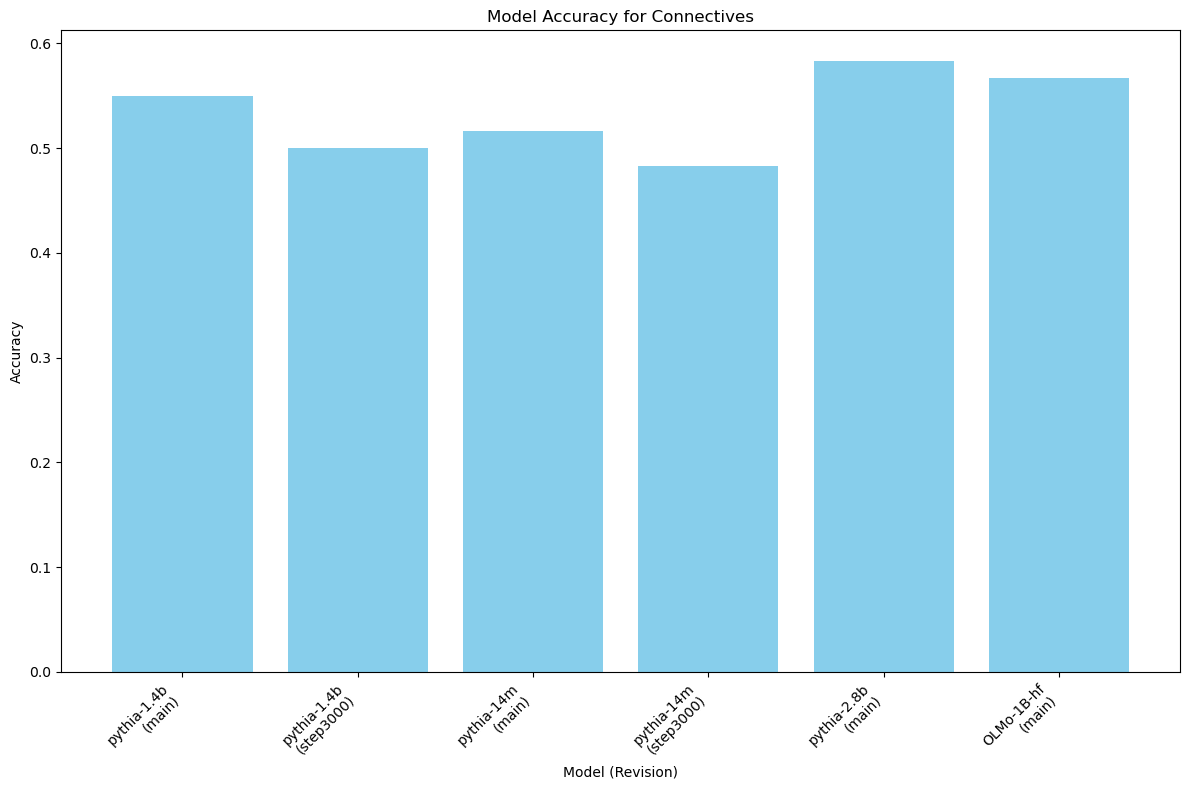

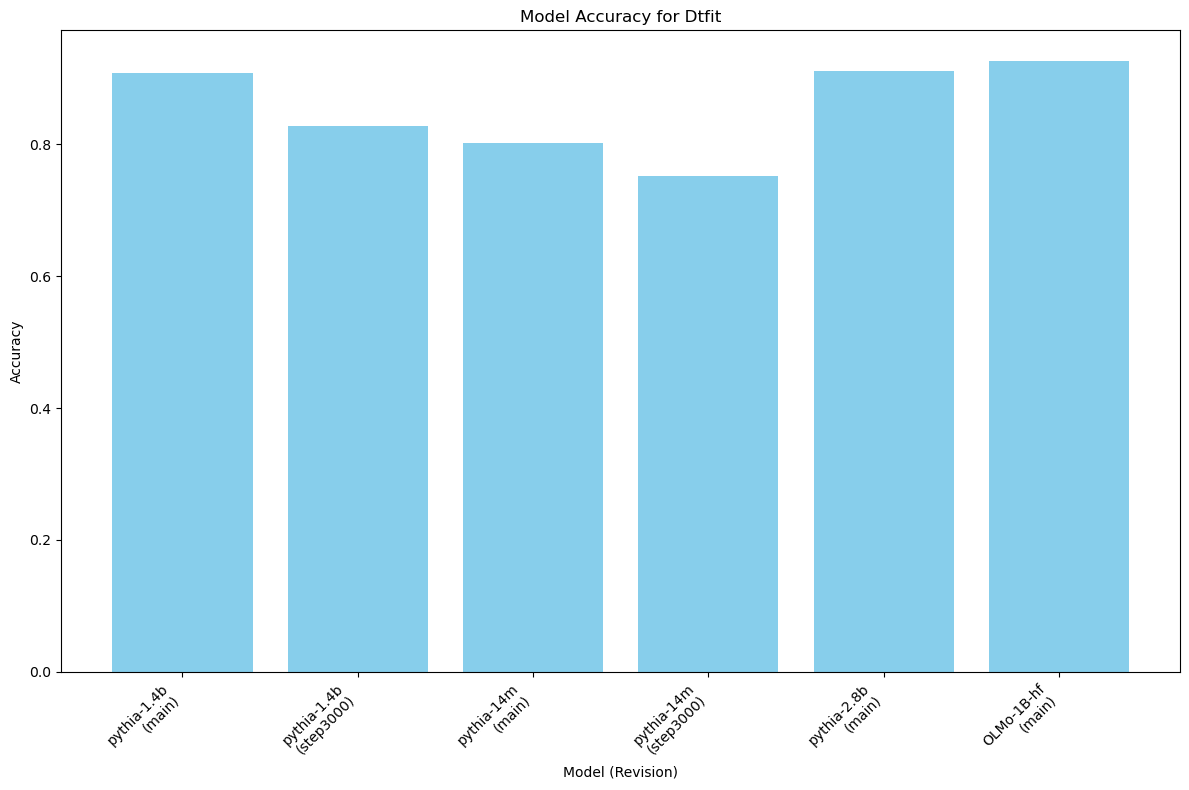

In [90]:
plot_accuracy(all_dfs)